In [26]:
#Полиномиальная регрессия
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump, load

In [2]:
data_1 = pd.read_csv('Advertising.csv')

In [3]:
X = data_1.drop('sales', axis=1)
y = data_1['sales']

In [4]:
polynomila_converter = PolynomialFeatures(degree=2, include_bias=False) #degree - максимальная степень полинома из признаков
                                                                        #interaction_only - оставить только произведение признаков
                                                                        #include_bias - наличие смещения

In [5]:
polynomila_converter.fit(X) #Анализирует признаки, не создает полиномиальные признаки

PolynomialFeatures(include_bias=False)

In [6]:
poly_features = polynomila_converter.transform(X) #Создание полиномиальных признаков

In [7]:
#Применяем полиномиальную регрессию

In [8]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
test_prediction = model.predict(X_test)

In [12]:
#Оценка работы модели

In [13]:
mean_absolute_error(y_test, test_prediction) #Средняя абсолютная ошибка

0.590597483380802

In [14]:
mean_squared_error(y_test, test_prediction) #Среднеквадратическая ошибка

0.5231944949055376

In [15]:
np.sqrt(mean_squared_error(y_test, test_prediction)) #Среднеквадратическое отклонение

0.7233218473857523

In [16]:
#Выбор оптимальной сложности модели(степень полинома)
#Создать несколько наборов признаков с разными степенями полинома
#Обучить модели
#Найти метрики моделей для обучающего и тестового набора данных
#Построить график зависимости ошибки от степени полинома

In [17]:
train_rmse_errors = []
test_rmse_errors = []
for degree in range(1, 10):
    polynomila_converter = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = polynomila_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    y_train_predict = lin_model.predict(X_train)
    y_test_predict = lin_model.predict(X_test)
    train_rmse_errors.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
    test_rmse_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))

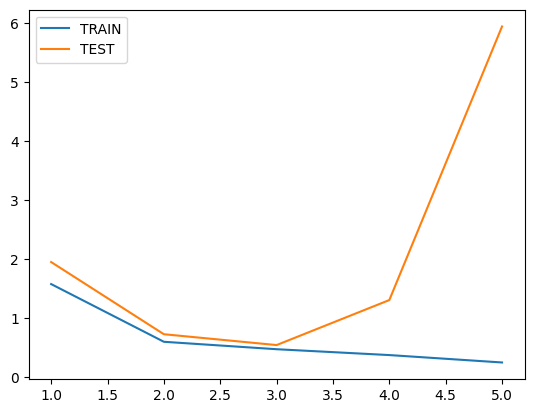

In [18]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='TRAIN')
plt.plot(range(1, 6), test_rmse_errors[:5], label='TEST')
plt.legend()

In [19]:
#Сохранение модели

In [22]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [23]:
final_model = LinearRegression()

In [24]:
full_converted_X = final_poly_converter.fit_transform(X)

In [25]:
final_model.fit(full_converted_X, y)

LinearRegression()

In [27]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [28]:
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [29]:
loaded_converter = load('final_poly_converter.joblib')

In [30]:
loaded_model = load('final_poly_model.joblib')